### Sprint 1 Review & Clustering Prep
-Now all the new features will be analyzed and also graphed.

In [ ]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# set the style for the plots
sns.set_style(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# load the featured dataset
data = pd.read_csv('../data/featured-data.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])

print(f'Loaded {len(data)} weekly training records from featured dataset.')
print(f'Athletes: {data["athlete"].nunique()}')
print(f'Date range: {data["timestamp"].min()} to {data["timestamp"].max()}')
data.head()

Loaded 14234 weekly training records from featured dataset.
Athletes: 116
Date range: 2009-12-28 00:00:00 to 2020-01-06 00:00:00


,athlete,timestamp,weekly_distance_m,weekly_mileage,weekly_time_s,avg_weekly_pace_km,avg_weekly_pace_mile,weekly_elevation_m,average heart rate (bpm),training_days,weekly_mileage_change,consistency_index,rest_days,recovery_ratio,fatigue_index,cumulative_mileage,training_intensity,actual_training_days
0,771514,2017-02-13,5355.4,3.327690,3371,10.490969,16.883583,81.6,NaN,1,NaN,NaN,6,6.0,0.554615,3.327690,0.095320,1
1,771514,2017-06-26,6243.5,3.879530,2137,5.628635,9.058413,37.2,NaN,2,0.551840,0.390210,5,2.5,1.551812,7.207220,0.177663,2
2,771514,2017-07-03,6630.2,4.119814,2306,5.796708,9.328900,95.6,162.1,1,0.240284,0.406145,6,6.0,0.686636,11.327034,0.172512,1
3,771514,2017-07-10,16955.9,10.535905,6086,5.964640,9.599160,177.8,154.2,2,6.416091,3.396341,5,2.5,4.214362,21.862939,0.167655,2
4,771514,2017-07-17,6191.1,3.846970,2216,5.965553,9.600629,57.3,145.0,1,-6.688935,3.295813,6,6.0,0.641162,25.709909,0.167629,1


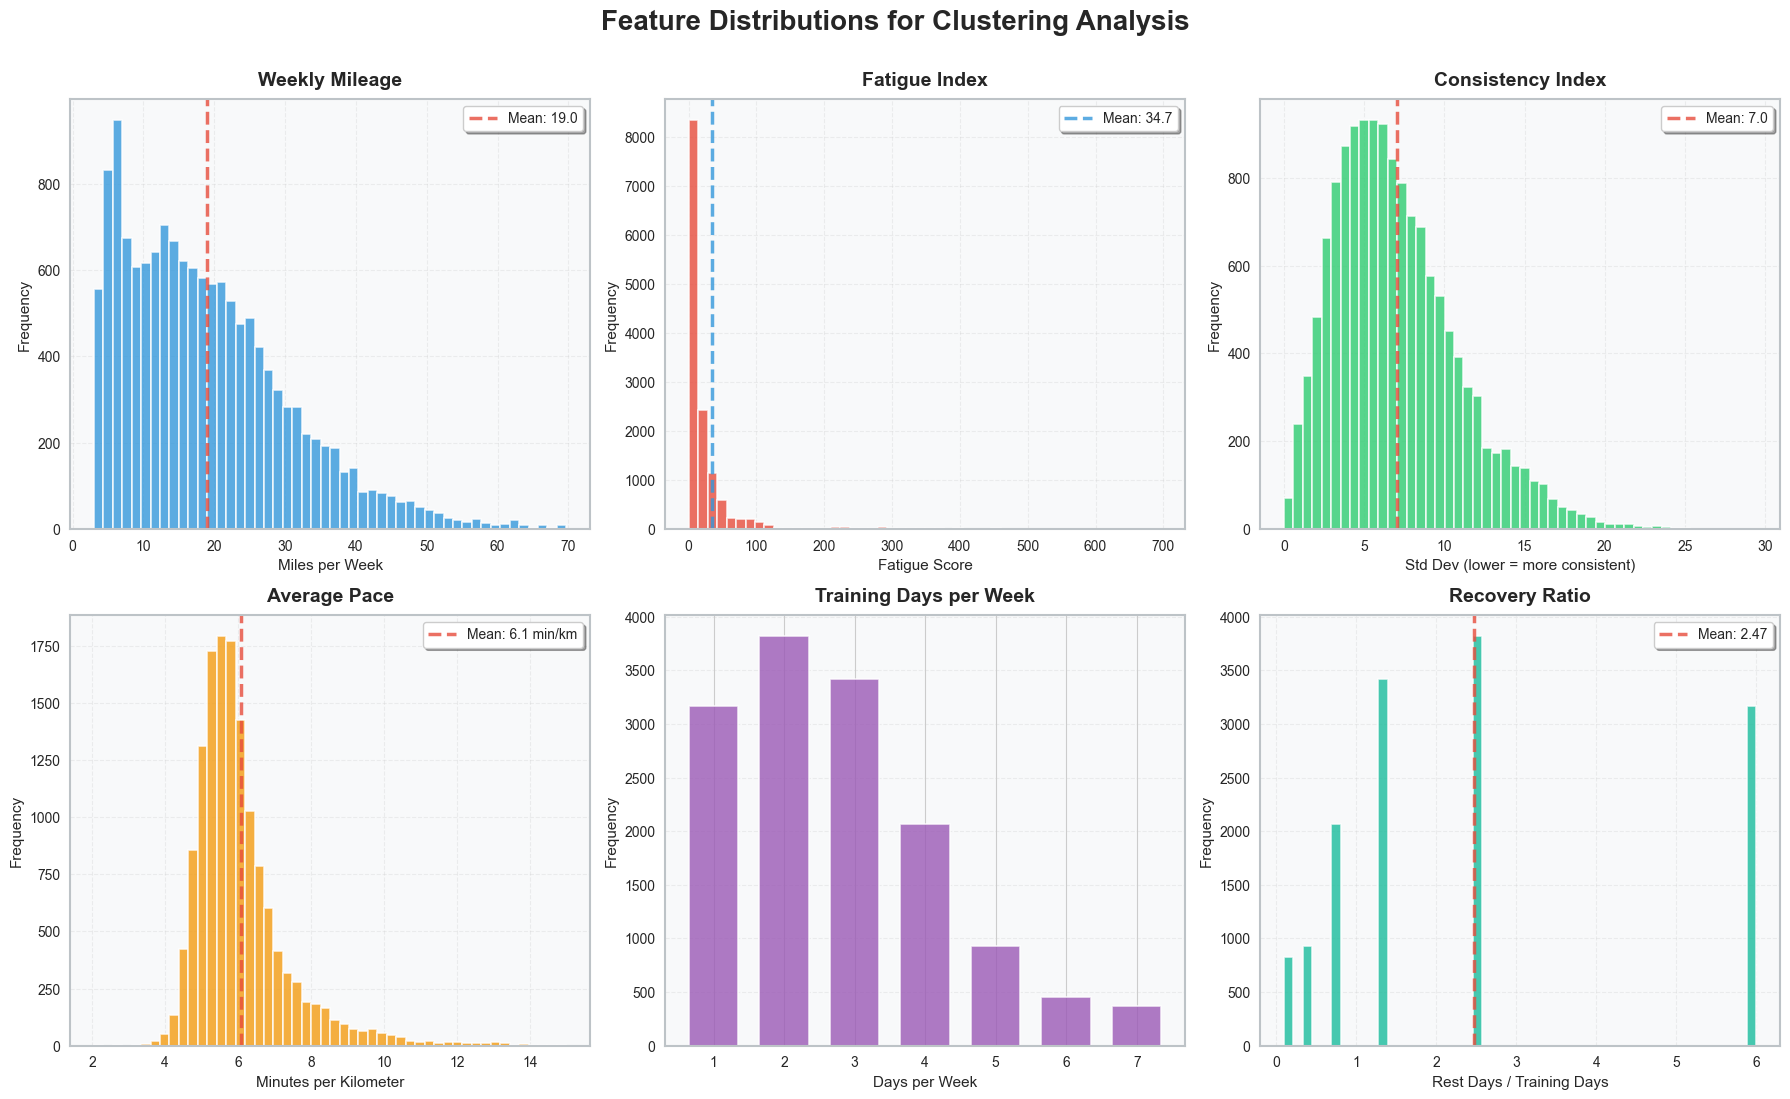

In [ ]:
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(2, 3, figsize=(18, 11))
fig.patch.set_facecolor('white')
fig.suptitle('Feature Distributions for Clustering Analysis', 
             fontsize=20, fontweight='bold', y=0.995)

# 1. Weekly Mileage
axes[0, 0].hist(data['weekly_mileage'], bins=50, color=colors[0], 
                edgecolor='white', alpha=0.8, linewidth=1.2)
axes[0, 0].set_title('Weekly Mileage', fontsize=14, fontweight='bold', pad=10)
axes[0, 0].set_xlabel('Miles per Week', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
mean_val = data['weekly_mileage'].mean()
axes[0, 0].axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2.5, 
                   label=f'Mean: {mean_val:.1f}', alpha=0.8)
axes[0, 0].legend(fontsize=10, frameon=True, shadow=True)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')
axes[0, 0].set_facecolor('#f8f9fa')

# 2. Fatigue Index
axes[0, 1].hist(data['fatigue_index'], bins=50, color=colors[1], 
                edgecolor='white', alpha=0.8, linewidth=1.2)
axes[0, 1].set_title('Fatigue Index', fontsize=14, fontweight='bold', pad=10)
axes[0, 1].set_xlabel('Fatigue Score', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
mean_val = data['fatigue_index'].mean()
axes[0, 1].axvline(mean_val, color='#3498db', linestyle='--', linewidth=2.5,
                   label=f'Mean: {mean_val:.1f}', alpha=0.8)
axes[0, 1].legend(fontsize=10, frameon=True, shadow=True)
axes[0, 1].grid(True, alpha=0.3, linestyle='--')
axes[0, 1].set_facecolor('#f8f9fa')

# 3. Consistency Index
axes[0, 2].hist(data['consistency_index'].dropna(), bins=50, color=colors[2],
                edgecolor='white', alpha=0.8, linewidth=1.2)
axes[0, 2].set_title('Consistency Index', fontsize=14, fontweight='bold', pad=10)
axes[0, 2].set_xlabel('Std Dev (lower = more consistent)', fontsize=11)
axes[0, 2].set_ylabel('Frequency', fontsize=11)
mean_val = data['consistency_index'].mean()
axes[0, 2].axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2.5,
                   label=f'Mean: {mean_val:.1f}', alpha=0.8)
axes[0, 2].legend(fontsize=10, frameon=True, shadow=True)
axes[0, 2].grid(True, alpha=0.3, linestyle='--')
axes[0, 2].set_facecolor('#f8f9fa')

# 4. Average Pace
axes[1, 0].hist(data['avg_weekly_pace_km'], bins=50, color=colors[3],
                edgecolor='white', alpha=0.8, linewidth=1.2)
axes[1, 0].set_title('Average Pace', fontsize=14, fontweight='bold', pad=10)
axes[1, 0].set_xlabel('Minutes per Kilometer', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
mean_val = data['avg_weekly_pace_km'].mean()
axes[1, 0].axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2.5,
                   label=f'Mean: {mean_val:.1f} min/km', alpha=0.8)
axes[1, 0].legend(fontsize=10, frameon=True, shadow=True)
axes[1, 0].grid(True, alpha=0.3, linestyle='--')
axes[1, 0].set_facecolor('#f8f9fa')

# 5. Training Days (Bar chart instead of histogram for discrete values)
training_counts = data['actual_training_days'].value_counts().sort_index()
axes[1, 1].bar(training_counts.index, training_counts.values, color=colors[4],
               edgecolor='white', alpha=0.8, linewidth=1.2, width=0.7)
axes[1, 1].set_title('Training Days per Week', fontsize=14, fontweight='bold', pad=10)
axes[1, 1].set_xlabel('Days per Week', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_xticks(range(1, 8))
axes[1, 1].grid(True, alpha=0.3, linestyle='--', axis='y')
axes[1, 1].set_facecolor('#f8f9fa')

# 6. Recovery Ratio
axes[1, 2].hist(data['recovery_ratio'], bins=50, color=colors[5],
                edgecolor='white', alpha=0.8, linewidth=1.2)
axes[1, 2].set_title('Recovery Ratio', fontsize=14, fontweight='bold', pad=10)
axes[1, 2].set_xlabel('Rest Days / Training Days', fontsize=11)
axes[1, 2].set_ylabel('Frequency', fontsize=11)
mean_val = data['recovery_ratio'].mean()
axes[1, 2].axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2.5,
                   label=f'Mean: {mean_val:.2f}', alpha=0.8)
axes[1, 2].legend(fontsize=10, frameon=True, shadow=True)
axes[1, 2].grid(True, alpha=0.3, linestyle='--')
axes[1, 2].set_facecolor('#f8f9fa')

# Add subtle border to entire figure
for ax in axes.flat:
    for spine in ax.spines.values():
        spine.set_edgecolor('#bdc3c7')
        spine.set_linewidth(1.5)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig('../visualizations/feature_distributions.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [ ]:
# Aggregate weekly data to athlete level for clustering
# Creates a single profile per athlete by averaging weekly features

athlete_profiles = data.groupby('athlete').agg({
    'weekly_mileage': 'mean',
    'avg_weekly_pace_km': 'mean',
    'actual_training_days': 'mean',
    'fatigue_index': 'mean',
    'consistency_index': 'mean',
    'recovery_ratio': 'mean',
    'weekly_elevation_m': 'mean',
    'training_intensity': 'mean'
}).reset_index()

# Rename columns for clarity
athlete_profiles.columns = [
    'athlete',
    'avg_weekly_mileage',
    'avg_pace_km',
    'avg_training_days',
    'avg_fatigue_index',
    'avg_consistency_index',
    'avg_recovery_ratio',
    'avg_elevation',
    'avg_training_intensity'
]

print(f"\nCreated athlete profiles: {len(athlete_profiles)} runners")
print("\nAthlete profile summary:")
athlete_profiles.describe()


Created athlete profiles: 116 runners

Athlete profile summary:


,athlete,avg_weekly_mileage,avg_pace_km,avg_training_days,avg_fatigue_index,avg_consistency_index,avg_recovery_ratio,avg_elevation,avg_training_intensity
count,1.160000e+02,116.000000,116.000000,116.000000,116.000000,115.000000,116.000000,116.000000,116.000000
mean,1.909509e+07,17.339020,6.127861,2.616805,32.049471,6.550944,2.706244,553.596721,0.169346
std,1.055847e+07,7.622110,0.745118,0.896870,50.236094,2.115656,1.071621,388.886023,0.018259
min,7.715140e+05,4.067557,4.545143,1.000000,0.677926,0.613484,0.438462,14.500000,0.106302
25%,1.133267e+07,12.860150,5.644614,2.070261,8.825606,5.361856,2.047117,224.505804,0.158329
50%,1.893487e+07,16.760250,6.040175,2.378039,16.702571,6.691105,2.758655,465.642299,0.170079
75%,2.640956e+07,20.972824,6.513689,2.931953,28.263755,7.916388,3.305895,815.735109,0.180542
max,4.681758e+07,47.643995,9.407185,5.846715,337.163742,11.259073,6.000000,1665.757547,0.220283


In [ ]:
# Select features for clustering
clustering_features = [
    'avg_weekly_mileage',
    'avg_pace_km',
    'avg_training_days',
    'avg_fatigue_index',
    'avg_consistency_index',
    'avg_recovery_ratio'
]

# Create clustering input (drop NaN values)
clustering_data = athlete_profiles[clustering_features].dropna()

print(f"Athletes with complete data: {len(clustering_data)}")

# Scale the features (CRITICAL for K-Means!)
# K-Means is distance-based, so all features need same scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data)

# Create scaled DataFrame
scaled_df = pd.DataFrame(
    scaled_features,
    columns=clustering_features,
    index=clustering_data.index
)

print("\nScaled feature summary (should be ~0 mean, ~1 std):")
print(scaled_df.describe())

Athletes with complete data: 115

Scaled feature summary (should be ~0 mean, ~1 std):
       avg_weekly_mileage   avg_pace_km  avg_training_days  avg_fatigue_index  \
count        1.150000e+02  1.150000e+02       1.150000e+02       1.150000e+02   
mean        -3.475481e-17 -8.094974e-16       1.081261e-16      -4.151269e-17   
std          1.004376e+00  1.004376e+00       1.004376e+00       1.004376e+00   
min         -1.774340e+00 -2.289369e+00      -1.812463e+00      -6.306432e-01   
25%         -5.964925e-01 -6.751864e-01      -6.096683e-01      -4.627612e-01   
50%         -9.038967e-02 -9.005176e-02      -2.702623e-01      -3.097083e-01   
75%          4.711278e-01  5.921358e-01       3.579742e-01      -8.039001e-02   
max          4.006135e+00  3.218805e+00       3.602814e+00       6.077891e+00   

       avg_consistency_index  avg_recovery_ratio  
count           1.150000e+02        1.150000e+02  
mean            4.624320e-16       -2.703152e-17  
std             1.004376e+00   

In [ ]:
# Save scaled data and athlete profiles for clustering
scaled_df.to_csv('../data/scaled_clustering_data.csv', index=True)
athlete_profiles.to_csv('../data/athlete_profiles.csv', index=False)

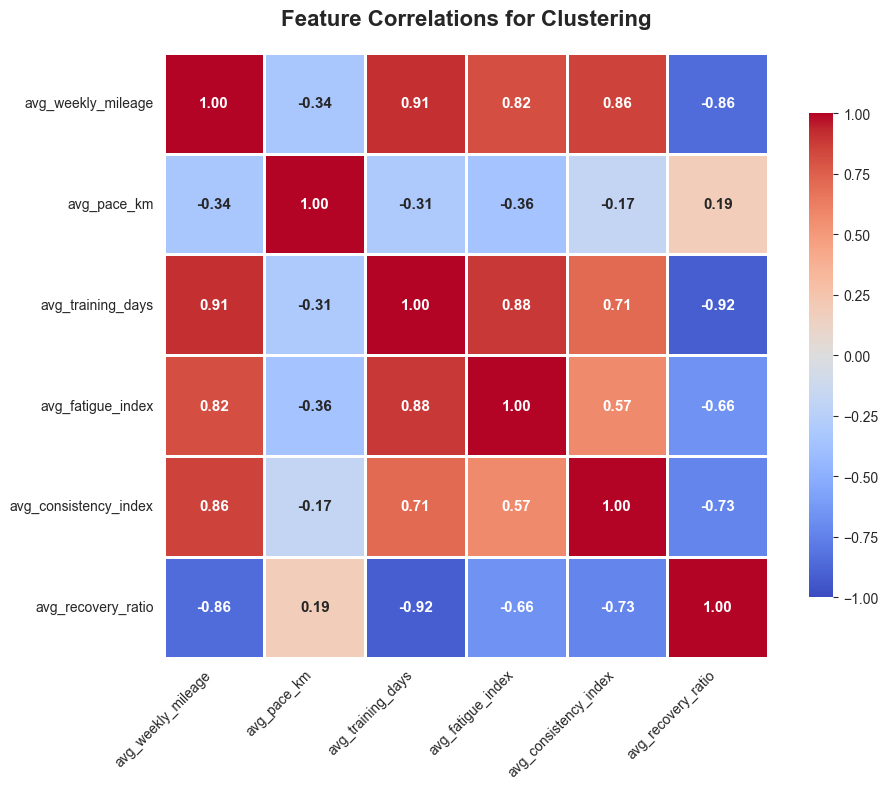


 Correlation analysis complete!

 Interpretation:
   • Red = Positive correlation (features move together)
   • Blue = Negative correlation (features move opposite)
   • Look for values >0.8 or <-0.8 (very strong correlation)


In [ ]:
# checks correlation between features

plt.figure(figsize=(10, 8))
correlation_matrix = athlete_profiles[clustering_features].corr()

# making a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, annot_kws={'size': 11, 'weight': 'bold'})

plt.title('Feature Correlations for Clustering', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('../visualizations/feature_correlations.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n Correlation analysis complete!")
print("\n Interpretation:")
print("   • Red = Positive correlation (features move together)")
print("   • Blue = Negative correlation (features move opposite)")
print("   • Look for values >0.8 or <-0.8 (very strong correlation)")